<a href="https://colab.research.google.com/github/gustavodiasz/ANALISE-DE-DADOS-PARA-MACHINE-LEARNING-COM-PYTHON/blob/main/Machine_Learning_e_Data_Science_com_Python_de_A_a_Z_gustavo_dias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PRÉ-PROCESSAMENTO DOS DADOS 

CONTEÚDO:



*  BASE DE DADOS:
    * Dados de Crédito
    * Censo   
*  Carregamento da base de dados:
*  Valores inconsistentes;
*  Escalonamento de atributos;
*  Transformação de variáveis categóricas;
*  Intrdução a avaliação de algoritimos;
*  Base de treino e base de teste;
* [EXTRA] alguns recuros do pandas (localizar, remover linhas e colunas, alterear valores e etc) 




TIPOS DE VARIÁVEIS:

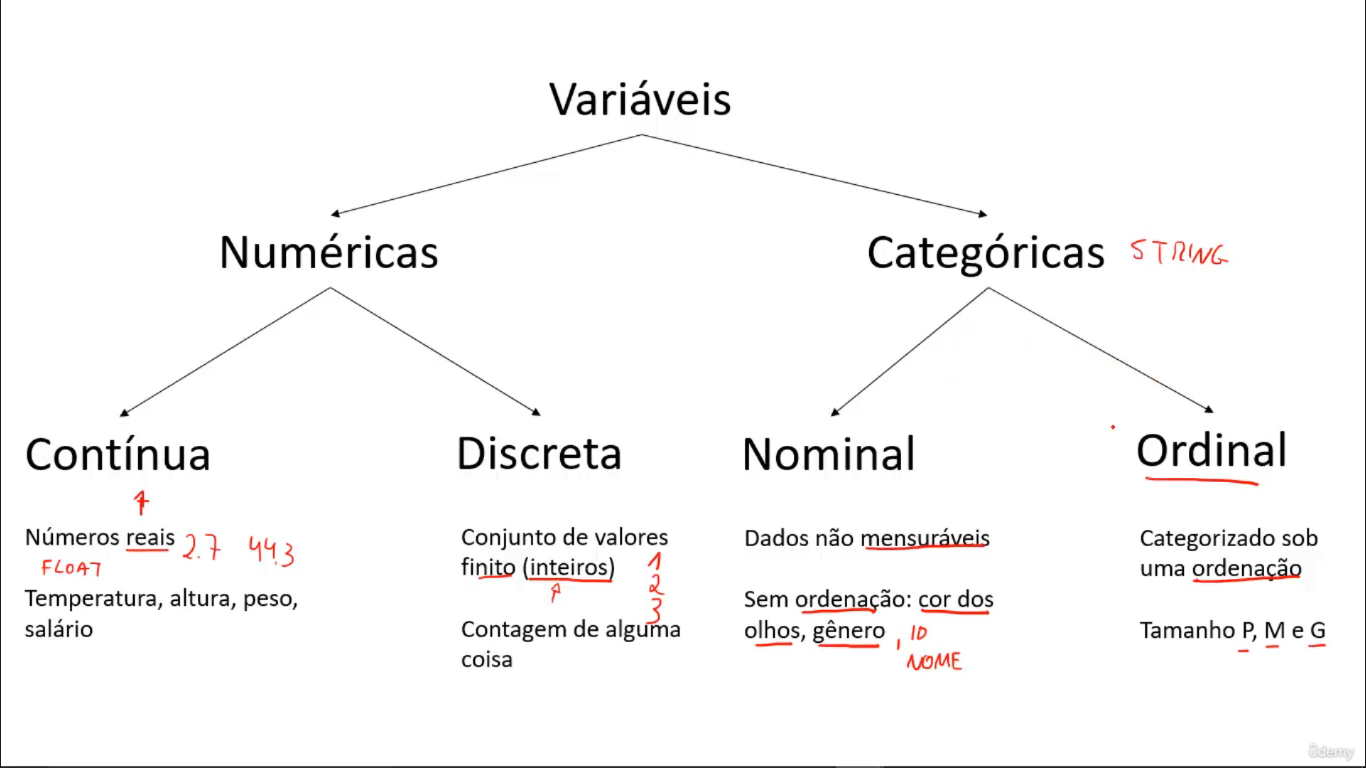



IMPORTAÇÃO DAS BIBLIOTECAS:

OBS: A biblioteca *plotly* nativa do Colab está em uma versão antiga, por isso vamos usar o *!pip --upgrade* para instalarmos a versão mais recente. 


In [ ]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 28.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


Agora vamos instalar as outras biblioteca que iremos precisar, mas que ja estam atualizadas no Colab, por isso não precisa instalar, apenas importar.

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as seaborn
import plotly.express as px 
import pandas as pd 

In [ ]:
# aqui adiconamos à variável "base_credit" o caminho do arquivo no qual está os dados que usaremos.
# para isso usamos a biblioteca "pandas" que chamamos de "pd"

base_credit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ Machine Learning e Data Science com Python de A a Z/credit_data.csv')


In [ ]:
# VISUALIZAÇÃO DOS DADOS:

# Entendendo a base de dados:

# Primeira coluna temos uma contagem das linhas, iniciando em zero até 1999; 

# segunda coluna temos o "clientid" que é o nome do cliente, aqui para prezervar identidade,
# foi colocado numeros de 1 a 2000, cada cliente tem um número específico, como se fosse seu nome;

# terceira coluna temos "income" que é a renda anual do cliene;

# quarta coluna temos "age" idade do cliente;

# quinta coluna temos "loan" divida do clinete;

# sexta coluna temos "defaut" que é se o clinete pagou ou não o imprestimo ao banco.

# 0 == PAGOU
# 1 == NÃO PAGOU

base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
# realizando comando para visualizar algumas estatisticas:

# apenas com essas estatisticas podemos notar: 
    # idades faltando (a quantidade foi menor do que 2000);
    # idades negativas;
    
base_credit.describe() 

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [ ]:
# aqui podemos ver quantos clintes colocaram idades negativas para posterior tratamento:

base_credit[base_credit['age'] < 0 ]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


TRATAMNETO DOS VALORES FALTANTES E INCONSISTENTES.

In [ ]:
# para realizar o tratamento desses valores negativos, a no conexto da machine learni, podemos considerar 4 formas:
    # apagar toda a coluna do atributo que apresnetar valores inconsistente ou faltoso;
    # apagar apenas o cliente, instancia, que apresnetar valor inconsistente ou faltoso; 
    # preencher o valor inconsistente ou faltoso com a média dos demais; 
    # entrar em contato com o cliente e pedir a informação correrta. 

# no nosso caso, valor completar os valores inconsistetes com o valor da média dos demais da mesma classe. 
 
# ESSE É O CÓDIGO PARA OBTER A MÉDIA DA IDADE 'age' JÁ DESCONTANDO OS VALORES MENORES QUE ZERO.

base_credit['age'][base_credit['age'] > 0 ].mean()


40.92770044906149

In [ ]:
# agora vamos colocar no lugar dos valores inconsistentes essa média.

# .loc é uma função do pandas para localizar

base_credit.loc[base_credit['age'] < 0 ] = base_credit['age'][base_credit['age'] > 0 ].mean()


In [ ]:
# vamos averiguar se os clinetes 16, 22 e 27 foram atualizados para terem a idade igual a média.

base_credit.loc[base_credit['clientid'] == 16]

,clientid,income,age,loan,default
15,16.0,50501.726689,40.9277,3977.287432,0.0


In [ ]:
base_credit.loc[base_credit['clientid'] == 22]

,clientid,income,age,loan,default
21,22.0,32197.620701,40.9277,4244.057136,0.0


In [ ]:
base_credit.loc[base_credit['clientid'] == 27]

,clientid,income,age,loan,default
26,27.0,63287.038908,40.9277,9595.286289,0.0
